In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': (12, 6)}, style='whitegrid')

In [2]:
def pairs_getter(list_of_goods):
    
    return [(a, b) for idx, a in enumerate(list_of_goods) for b in list_of_goods[(idx+1):]]

## Получение и проверка данных

In [3]:
goods = pd.read_csv('https://stepik.org/media/attachments/lesson/409319/test1_completed.csv').rename(columns={'Товар': 'item', 'Количество': 'amount'})

In [4]:
print(goods.id.nunique())
goods.head()

3273


,id,item,amount
0,17119,Лимон,1.1
1,17119,Лимон оранжевый,0.7
2,17119,Лук-порей,10.0
3,17119,Лук репчатый,2.5
4,17119,Малина свежая,1.0


In [5]:
goods.duplicated().any()

False

In [6]:
goods.isna().sum()

id        0
item      0
amount    0
dtype: int64

## Топ-10 товаров по популярности

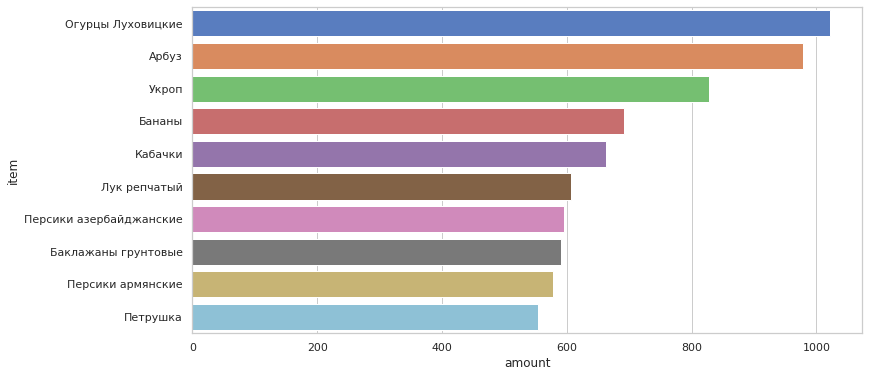

In [7]:
top_20_goods = goods.groupby(['item']).agg({'amount': 'count'}) \
                    .sort_values(by='amount', ascending =False).head(10).reset_index()
sns.barplot(y=top_20_goods.item, x=top_20_goods.amount, palette='muted');

## Расчёт встречаемости товарных пар

In [8]:
id_vs_item_df = goods.groupby('id').agg({'item': list}).reset_index()

In [9]:
id_vs_item_df['pairs'] = id_vs_item_df.item.apply(pairs_getter)

In [10]:
id_vs_item_df.head()

,id,item,pairs
0,17119,"[Лимон, Лимон оранжевый, Лук-порей, Лук репчат...","[(Лимон, Лимон оранжевый), (Лимон, Лук-порей),..."
1,17530,"[Лимон оранжевый, Изюм Султана, Капуста цветна...","[(Лимон оранжевый, Изюм Султана), (Лимон оранж..."
2,17618,"[Абрикосы молдавские, Кукуруза мини, Грибы лис...","[(Абрикосы молдавские, Кукуруза мини), (Абрико..."
3,17724,"[Абрикосы молдавские, Арбуз, Салат Айсберг, Га...","[(Абрикосы молдавские, Арбуз), (Абрикосы молда..."
4,17814,"[Арбуз, Кабачки, Кинза, Малина свежая, Морковь...","[(Арбуз, Кабачки), (Арбуз, Кинза), (Арбуз, Мал..."


In [11]:
d = {}

for i in range(len(id_vs_item_df['pairs'])):
    for key in id_vs_item_df['pairs'][i]:
        
        if key[::-1] in d.keys():
            d[key[::-1]] = d.get(key[::-1], 0) + 1
            continue
            
        d[key] = d.get(key, 0) + 1

In [12]:
d = pd.DataFrame.from_dict(d, orient='index', columns=['occurrence']) \
                            .reset_index().rename(columns={'index': 'name'})

In [13]:
d = d.sort_values(by='occurrence', ascending=False)

In [14]:
d.head()

,name,occurrence
291,"(Огурцы Луховицкие, Укроп)",431
297,"(Петрушка, Укроп)",408
3630,"(Арбуз, Огурцы Луховицкие)",345
855,"(Кабачки, Огурцы Луховицкие)",326
443,"(Кинза, Укроп)",303


## Проверка полученного df
### на потерю пар и наличие дубликатов типа (товар_1, товар_2) / (товар_2, товар_1)

In [15]:
d.occurrence.sum() # суммарное количество пар в итоговом df

385110

In [16]:
a = sum([len(id_vs_item_df.pairs[i]) for i in range(id_vs_item_df.shape[0])])  # суммарное количество пар в изначальном df

print(d.occurrence.sum()==a)

True


In [17]:
d_names = d.name.to_list()
reversed_d_names = [i[::-1] for i in d_names]

set(d_names).intersection(set(reversed_d_names))  # пересекается ли множество имён в словаре d с "обратным" множеством имён

set()

## Получение итоговой таблицы

In [18]:
final = pd.DataFrame(d.name.tolist()).rename(columns={0: 'item_one', 1: 'item_two'})
final['occurence'] = d.occurrence.to_list()

In [19]:
final.head(10)

,item_one,item_two,occurence
0,Огурцы Луховицкие,Укроп,431
1,Петрушка,Укроп,408
2,Арбуз,Огурцы Луховицкие,345
3,Кабачки,Огурцы Луховицкие,326
4,Кинза,Укроп,303
5,Лук зеленый,Укроп,300
6,Огурцы Луховицкие,Петрушка,286
7,Лук репчатый,Огурцы Луховицкие,285
8,Баклажаны грунтовые,Кабачки,284
9,Кабачки,Укроп,281


In [20]:
d.occurrence.sum() == final.occurence.sum()

True

In [21]:
print("__________________________________")
print('5 наиболее популярных пар товаров:')
final.head()

__________________________________
5 наиболее популярных пар товаров:


,item_one,item_two,occurence
0,Огурцы Луховицкие,Укроп,431
1,Петрушка,Укроп,408
2,Арбуз,Огурцы Луховицкие,345
3,Кабачки,Огурцы Луховицкие,326
4,Кинза,Укроп,303


### Выводы

Проведён анализ полученного датафрейма

Выделены всевозможные пары товаров

Пары проверены на дубликаты типа (товар_1, товар_2) / (товар_2, товар_1)

Составлен список встречаемости каждой пары